In [ ]:
!pip install opendatasets

In [6]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import opendatasets as od
from PIL import Image

from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
# plt.rcParams['figure.figsize'] = [20, 5]

In [2]:
od.download('https://www.kaggle.com/datasets/drgfreeman/rockpaperscissors', './data')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle username:Your Kaggle Key:Downloading rockpaperscissors.zip to ./data/rockpaperscissors


100%|██████████| 306M/306M [01:02<00:00, 5.09MB/s] 


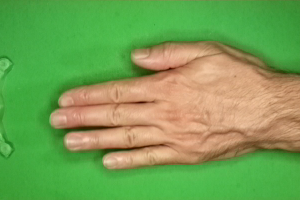

In [3]:
image = Image.open('data/rockpaperscissors/paper/04l5I8TqdzF9WDMJ.png')
image

In [14]:
image_raw = np.array(image)
image_raw.shape

(200, 300, 3)

In [19]:
transformed_image = image_raw.dot(np.array([65536, 256, 1]))
transformed_image.shape

(200, 300)

### Data preparation for KNN

In [49]:
TRAIN_N, TEST_N = 500, 200
N = TRAIN_N + TEST_N

classes = ['rock', 'paper', 'scissors']

TRAIN_N, TEST_N = len(classes)*TRAIN_N, len(classes)*TEST_N

X = []
y = []

color_transform = np.array([65536, 256, 1])

for class_id, class_name in enumerate(classes):
    for filename in os.listdir(f'./data/rockpaperscissors/{class_name}')[:N]:
        image = np.array(Image.open(f'./data/rockpaperscissors/{class_name}/{filename}'))
        X.append(image.dot(color_transform).flatten())
        y.append(class_id)

perm = np.random.permutation(len(y))

X = np.array(X)[perm]
y = np.array(y)[perm]

train_X, train_y = X[:TRAIN_N], y[:TRAIN_N]
test_X, test_y = X[TRAIN_N:], y[TRAIN_N:]

### Training KNN model

In [51]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(train_X, train_y)
model.score(test_X, test_y)

0.9266666666666666

In [45]:
classes[model.predict(transformed_image.reshape(1,-1))[0]]

'paper'

### Results

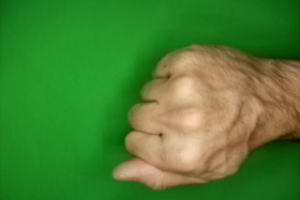

In [72]:
rock = Image.open('./data/rockpaperscissors/rock/gaZKijiVXyjhSLYp.png')
rock

In [73]:
classes[model.predict(np.array(rock).dot(color_transform).reshape(1,-1))[0]]

'rock'

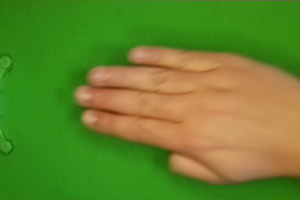

In [74]:
paper = Image.open('./data/rockpaperscissors/paper/fSWSXO9fumLluiAF.png')
paper

In [76]:
classes[model.predict(np.array(paper).dot(color_transform).reshape(1,-1))[0]]

'paper'

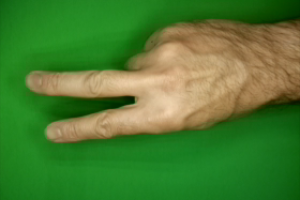

In [77]:
scissors = Image.open('./data/rockpaperscissors/scissors/ePMywMOdTHYyxe1o.png')
scissors

In [78]:
classes[model.predict(np.array(scissors).dot(color_transform).reshape(1,-1))[0]]

'scissors'